In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# define the rover direction by Left or Right turn action
def rover_turn (direction,turn):
    if direction == 'N':
        direction_val = 1
    elif direction == 'E':
        direction_val = 2
    elif direction == 'S':
        direction_val = 3
    elif direction == 'W':
        direction_val = 4
    if turn == 'R':
        turn_val = 1
    elif turn == 'L' :
        turn_val = -1
    new_direction_val = direction_val + turn_val
    if new_direction_val%4 == 0:
        new_direction = 'W'
    elif new_direction_val%4 == 1:
        new_direction = 'N'
    elif new_direction_val%4 == 2:
        new_direction = 'E'
    elif new_direction_val%4 == 3:
        new_direction = 'S'
    return new_direction

In [3]:
# map the movement by rover direction and coordinate (x,y)
def rover_move (loc_x,loc_y,direction,maker_symbol):
    if direction == 'N':
        loc_y = loc_y + 1
    elif direction == 'E':
        loc_x = loc_x + 1
    elif direction == 'S':
        loc_y = loc_y - 1
    elif direction == 'W':
        loc_x = loc_x - 1
    return [['M',loc_x,loc_y,direction,maker_symbol]]

In [4]:
def direction2maker (direction):
    if direction == 'N':
        maker_symbol = '^'
    elif direction == 'E':
        maker_symbol = '>'
    elif direction == 'S':
        maker_symbol = 'v'
    elif direction == 'W':
        maker_symbol = '<'
    return maker_symbol

In [5]:
# input
grid_x = 5
grid_y = 5
loc_x_start = 1
loc_y_start = 2
direction_start = 'N'
action = 'LMLMLMLMM'

In [6]:
# initial location
maker_start = direction2maker(direction_start)
rows = [['S',loc_x_start,loc_y_start,direction_start,maker_start]]
df = pd.DataFrame(rows, columns=["action","xloc","yloc","dr","maker_symbol"])

In [7]:
for i in range(len(action)):
    if action[i:i+1] == 'L' or action[i:i+1] == 'R':
        df = df.append(df[-1:])
        df = df.reset_index(drop=True)
        df_direction_new = rover_turn(df.at[len(df)-1,'dr'],action[i:i+1])
        df.at[len(df)-1,'action'] = 'T'
        df.at[len(df)-1,'dr'] = df_direction_new
        df.at[len(df)-1,'maker_symbol'] = direction2maker(df_direction_new)
    elif action[i:i+1] == 'M':
        row = rover_move(df.at[len(df)-1,'xloc'],df.at[len(df)-1,'yloc'],df.at[len(df)-1,'dr'],df.at[len(df)-1,'maker_symbol'])
        df_add = pd.DataFrame(row, columns=["action","xloc","yloc","dr","maker_symbol"])
        df = df.append(df_add)
        df = df.reset_index(drop=True)

In [8]:
print(df)

  action  xloc  yloc dr maker_symbol
0      S     1     2  N            ^
1      T     1     2  W            <
2      M     0     2  W            <
3      T     0     2  S            v
4      M     0     1  S            v
5      T     0     1  E            >
6      M     1     1  E            >
7      T     1     1  N            ^
8      M     1     2  N            ^
9      M     1     3  N            ^


In [9]:
xloc_out = str(df.at[len(df)-1,'xloc'])
yloc_out = str(df.at[len(df)-1,'yloc'])
dr_out = str(df.at[len(df)-1,'dr'])
print('new location:'+' '+xloc_out+' '+yloc_out+' '+dr_out)

new location: 1 3 N


In [10]:
rows = []
for x in range(5):
    for y in range(5):
        rows.append([x,y])
df_map = pd.DataFrame(rows, columns=["xloc","yloc"])

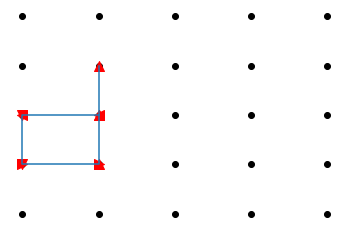

In [11]:
for index, row in df_map.iterrows():
    plt.scatter(row["xloc"], row["yloc"], marker='o',c='black')
for index, row in df.iterrows():
    plt.scatter(row["xloc"], row["yloc"], marker=row["maker_symbol"],c='red',s=100)
plt.plot('xloc','yloc',data=df)
plt.axis('off')
plt.show()